In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint

# Download historical data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Adj Close']

# Calculate correlation matrix
correlation_matrix = data.corr()

# Identify pairs with high correlation
threshold = 0.8
correlated_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns 
                    if col1 != col2 and correlation_matrix[col1][col2] > threshold]

# Check for cointegration
for pair in correlated_pairs:
    score, p_value, _ = coint(data[pair[0]], data[pair[1]])
    if p_value < 0.05:  # Significance level
        print(f"Cointegrated pair: {pair}, p-value: {p_value:.4f}")

[*********************100%%**********************]  4 of 4 completed


In [3]:
correlated_pairs

[('AAPL', 'GOOGL'),
 ('AAPL', 'MSFT'),
 ('GOOGL', 'AAPL'),
 ('GOOGL', 'MSFT'),
 ('MSFT', 'AAPL'),
 ('MSFT', 'GOOGL')]

In [4]:
import pandas as pd
import yfinance as yf

# Download historical data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Adj Close']

# Calculate correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

[*********************100%%**********************]  4 of 4 completed

Ticker      AAPL      AMZN     GOOGL      MSFT
Ticker                                        
AAPL    1.000000  0.172681  0.827947  0.939222
AMZN    0.172681  1.000000  0.456609  0.274980
GOOGL   0.827947  0.456609  1.000000  0.902145
MSFT    0.939222  0.274980  0.902145  1.000000


In [5]:
from statsmodels.tsa.stattools import coint

stock1 = data['AAPL']
stock2 = data['MSFT']
score, p_value, _ = coint(stock1, stock2)
print(f'Cointegration test p-value: {p_value}')

Cointegration test p-value: 0.2206166330679981


In [6]:
# Calculate spread
spread = stock1 - stock2

# Calculate Z-score
z_score = (spread - spread.mean()) / spread.std()

In [7]:
z_score

Date
2020-01-02    1.402272
2020-01-03    1.447786
2020-01-06    1.454644
2020-01-07    1.494102
2020-01-08    1.447361
                ...   
2023-12-22   -2.312163
2023-12-26   -2.335799
2023-12-27   -2.309944
2023-12-28   -2.339136
2023-12-29   -2.407007
Length: 1006, dtype: float64

[*********************100%%**********************]  2 of 2 completed


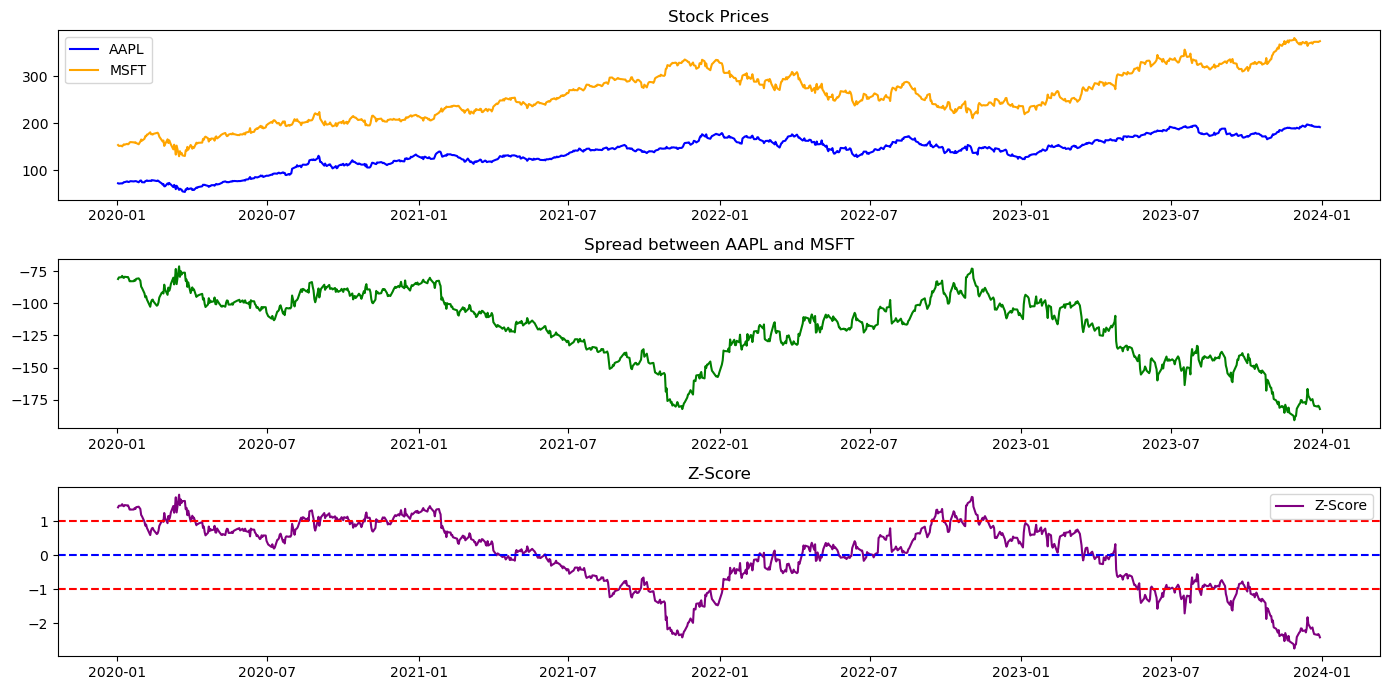

-1.0    582
 1.0    424
Name: count, dtype: int64


In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

# Function to download stock data
def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Function to calculate the spread
def calculate_spread(stock1, stock2):
    return stock1 - stock2

# Function to calculate Z-score
def calculate_z_score(spread):
    return (spread - spread.mean()) / spread.std()

# Function to generate signals based on Z-score thresholds
def generate_signals(z_score, entry_threshold, exit_threshold):
    signals = pd.Series(index=z_score.index)
    
    # Long signal when Z-score is below entry threshold
    signals[z_score < -entry_threshold] = 1  # Buy stock1, sell stock2
    # Short signal when Z-score is above entry threshold
    signals[z_score > entry_threshold] = -1  # Sell stock1, buy stock2
    # Exit signal when Z-score is between the exit thresholds
    signals[(z_score >= -exit_threshold) & (z_score <= exit_threshold)] = 0
    
    return signals.ffill()  # Forward fill the signals

# Parameters
tickers = ['AAPL', 'MSFT']
start_date = '2020-01-01'
end_date = '2024-01-01'
entry_threshold = 1.0  # Z-score threshold to enter positions
exit_threshold = 0.0    # Z-score threshold to exit positions

# Download historical data
data = download_data(tickers, start_date, end_date)

# Calculate spread
spread = calculate_spread(data['AAPL'], data['MSFT'])

# Calculate Z-score
z_score = calculate_z_score(spread)

# Generate signals
signals = generate_signals(z_score, entry_threshold, exit_threshold)

# Visualization
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.plot(data['AAPL'], label='AAPL', color='blue')
plt.plot(data['MSFT'], label='MSFT', color='orange')
plt.title('Stock Prices')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(spread, label='Spread', color='green')
plt.title('Spread between AAPL and MSFT')

plt.subplot(3, 1, 3)
plt.plot(z_score, label='Z-Score', color='purple')
plt.axhline(entry_threshold, linestyle='--', color='red')
plt.axhline(-entry_threshold, linestyle='--', color='red')
plt.axhline(exit_threshold, linestyle='--', color='blue')
plt.title('Z-Score')
plt.legend()

plt.tight_layout()
plt.show()

# Print signals
print(signals.value_counts())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


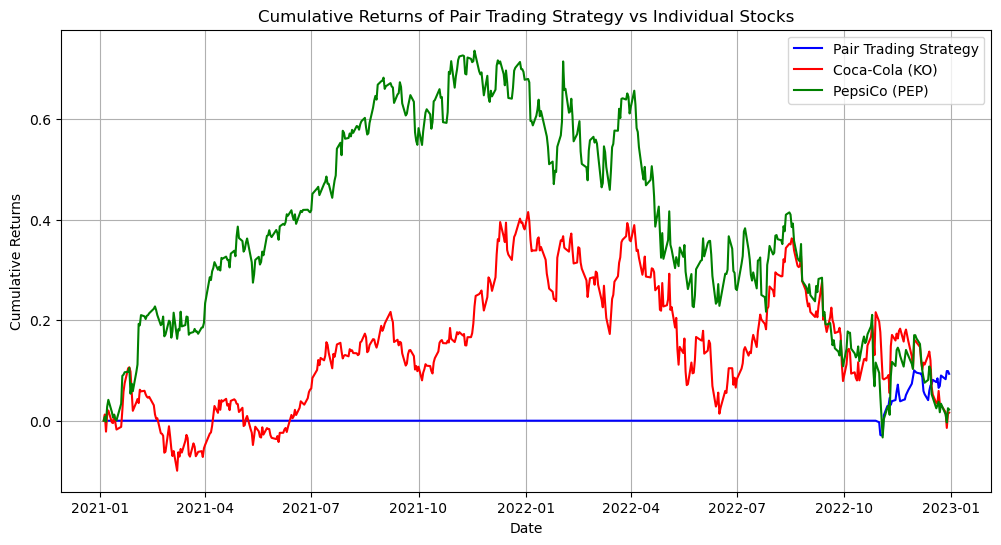

Total return of pair trading strategy: 9.33%
Total return of Coca-Cola (KO): 1.61%
Total return of PepsiCo (PEP): 2.23%


In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Download historical data
stock1 = yf.download("AAPL", start="2021-01-01", end="2023-01-01")["Adj Close"]
stock2 = yf.download("GOOGL", start="2021-01-01", end="2023-01-01")["Adj Close"]

# Calculate the spread between the two stocks
spread = stock1 - stock2

# Normalize the spread using Z-score
spread_z = zscore(spread)

# Define entry and exit Z-score thresholds
entry_threshold = 2.0  # Enter the trade if Z-score > 2 or Z-score < -2
exit_threshold = 0.5   # Exit the trade if Z-score returns close to zero

# Initialize trade signals
positions = pd.DataFrame(index=spread.index, columns=['Stock1_Position', 'Stock2_Position'])
positions.iloc[:] = 0

# Implement the trading strategy
for i in range(1, len(spread_z)):
    # Go long on Stock1 and short on Stock2 when Z-score is above the entry threshold
    if spread_z[i] > entry_threshold:
        positions['Stock1_Position'].iloc[i] = -1  # Short Stock1
        positions['Stock2_Position'].iloc[i] = 1   # Long Stock2
    
    # Go long on Stock2 and short on Stock1 when Z-score is below the negative entry threshold
    elif spread_z[i] < -entry_threshold:
        positions['Stock1_Position'].iloc[i] = 1   # Long Stock1
        positions['Stock2_Position'].iloc[i] = -1  # Short Stock2
    
    # Exit the position if Z-score is close to zero
    elif abs(spread_z[i]) < exit_threshold:
        positions['Stock1_Position'].iloc[i] = 0
        positions['Stock2_Position'].iloc[i] = 0
    else:
        # Hold the previous positions if no trade signal
        positions['Stock1_Position'].iloc[i] = positions['Stock1_Position'].iloc[i-1]
        positions['Stock2_Position'].iloc[i] = positions['Stock2_Position'].iloc[i-1]

# Calculate daily returns for each stock
returns_stock1 = stock1.pct_change().fillna(0)
returns_stock2 = stock2.pct_change().fillna(0)

# Calculate strategy returns based on position size and stock returns
strategy_returns = positions['Stock1_Position'].shift(1) * returns_stock1 + positions['Stock2_Position'].shift(1) * returns_stock2

# Calculate cumulative returns for strategy and individual stocks
cumulative_strategy_returns = (1 + strategy_returns).cumprod() - 1
cumulative_stock1_returns = (1 + returns_stock1).cumprod() - 1
cumulative_stock2_returns = (1 + returns_stock2).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_strategy_returns, label='Pair Trading Strategy', color='blue')
plt.plot(cumulative_stock1_returns, label='Coca-Cola (KO)', color='red')
plt.plot(cumulative_stock2_returns, label='PepsiCo (PEP)', color='green')
plt.title('Cumulative Returns of Pair Trading Strategy vs Individual Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()

# Display the total returns for comparison
print("Total return of pair trading strategy: {:.2f}%".format(cumulative_strategy_returns.iloc[-1] * 100))
print("Total return of Coca-Cola (KO): {:.2f}%".format(cumulative_stock1_returns.iloc[-1] * 100))
print("Total return of PepsiCo (PEP): {:.2f}%".format(cumulative_stock2_returns.iloc[-1] * 100))

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import coint

# Download historical data for multiple stocks
tickers = ['KO','PEP']
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Adj Close']

# Calculate correlation matrix
correlation_matrix = data.corr()

# Identify pairs with high correlation
threshold = 0.8
correlated_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns 
                    if col1 != col2 and correlation_matrix[col1][col2] > threshold]

# Check for cointegration
for pair in correlated_pairs:
    score, p_value, _ = coint(data[pair[0]], data[pair[1]])
    if p_value < 0.05:  # Significance level
        print(f"Cointegrated pair: {pair}, p-value: {p_value:.4f}")
    else:
        print("The stocks {} are not cointegrated and the p value is : {:.4f}".format(pair,p_value))

[*********************100%%**********************]  2 of 2 completed

The stocks ('KO', 'PEP') are not cointegrated and the p value is : 0.0744
The stocks ('PEP', 'KO') are not cointegrated and the p value is : 0.0920
